In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun


import datetime
import seaborn as sns
sns.set()

In [2]:
%load_ext autoreload
%autoreload

In [5]:
# plotting dfs:
('roi_df_plotting.csv')
('top_percent_roi_plotting.csv')
# ('chi_plot.csv')
('plot_df.csv')

# modeling dfs:
('top_roi_for_melting.csv')
('chi_roi_for_melting.csv')
('top_zips_with_all_columns.csv')

'top_zips_with_all_columns.csv'

In [64]:
df_top = pd.read_csv('top_zips_with_all_columns.csv', header=0, index_col=0)
df_top.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,217000.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,122700.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,143300.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [67]:
def melt_data(df): # from flatiron starter notebook
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='Time', value_name='Value')
#     melted['Time'] = pd.to_datetime(melted['Time'], format='%Y-%m')
    melted = melted.dropna(subset=['Value'])
    return melted

In [68]:
df_top = melt_data(df_top)
df_top.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,Time,Value
0,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
2,60640,Chicago,IL,Chicago,Cook,8,1996-04,216500.0
3,60647,Chicago,IL,Chicago,Cook,17,1996-04,122700.0
4,60618,Chicago,IL,Chicago,Cook,20,1996-04,142600.0


In [75]:
df_top.drop(['City', 'State', 'Metro', 
                     'CountyName', 'SizeRank'], inplace=True, axis=1)
df_top.head()


,ZipCode,Time,Value
0,60657,1996-04,334200.0
1,60614,1996-04,498100.0
2,60640,1996-04,216500.0
3,60647,1996-04,122700.0
4,60618,1996-04,142600.0


In [82]:
from sklearn.model_selection import TimeSeriesSplit

In [85]:
X = df_top.values
# splits = TimeSeriesSplit(n_splits=3)
# plt.figure(1)
# index = 1
# for train_index, test_index in splits.split(X):
#     train = X[train_index]
#     test = X[test_index]
#     print('Observations: %d' % (len(train) + len(test)))
#     print('Training Observations: %d' % (len(train)))
#     print('Testing Observations: %d' % (len(test)))
#     plt.subplot(310 + index)
#     plt.plot(train)
#     plt.plot([None for i in train] + [x for x in test])
# index += 1


# plt.show()

In [86]:
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))


train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

train=2490, test=1
train=2491, test=1
train=2492, test=1
train=2493, test=1
train=2494, test=1
train=2495, test=1
train=2496, test=1
train=2497, test=1
train=2498, test=1
train=2499, test=1
train=2500, test=1
train=2501, test=1
train=2502, test=1
train=2503, test=1
train=2504, test=1
train=2505, test=1
train=2506, test=1
train=2507, test=1
train=2508, test=1
train=2509, test=1
train=2510, test=1
train=2511, test=1
train=2512, test=1
train=2513, test=1
train=2514, test=1
train=2515, test=1
train=2516, test=1
train=2517, test=1
train=2518, test=1
train=2519, test=1
train=2520, test=1
train=2521, test=1
train=2522, test=1
train=2523, test=1
train=2524, test=1
train=2525, test=1
train=2526, test=1
train=2527, test=1
train=2528, test=1
train=2529, test=1
train=2530, test=1
train=2531, test=1
train=2532, test=1
train=2533, test=1
train=2534, test=1
train=2535, test=1
train=2536, test=1
train=2537, test=1
train=2538, test=1
train=2539, test=1
train=2540, test=1
train=2541, test=1
train=2542, 

train=4248, test=1
train=4249, test=1
train=4250, test=1
train=4251, test=1
train=4252, test=1
train=4253, test=1
train=4254, test=1
train=4255, test=1
train=4256, test=1
train=4257, test=1
train=4258, test=1
train=4259, test=1
train=4260, test=1
train=4261, test=1
train=4262, test=1
train=4263, test=1
train=4264, test=1
train=4265, test=1
train=4266, test=1
train=4267, test=1
train=4268, test=1
train=4269, test=1
train=4270, test=1
train=4271, test=1
train=4272, test=1
train=4273, test=1
train=4274, test=1
train=4275, test=1
train=4276, test=1
train=4277, test=1
train=4278, test=1
train=4279, test=1
train=4280, test=1
train=4281, test=1
train=4282, test=1
train=4283, test=1
train=4284, test=1
train=4285, test=1
train=4286, test=1
train=4287, test=1
train=4288, test=1
train=4289, test=1
train=4290, test=1
train=4291, test=1
train=4292, test=1
train=4293, test=1
train=4294, test=1
train=4295, test=1
train=4296, test=1
train=4297, test=1
train=4298, test=1
train=4299, test=1
train=4300, 

In [8]:
df = pd.read_csv('plot_df.csv')
df.head()

,time,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
0,2011-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,...,127600.0,196600.0,316500.0,148800.0,289000.0,532700.0,372500.0,195100.0,429900.0,179800.0
1,2011-02,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,...,126900.0,195000.0,317900.0,148700.0,288100.0,531700.0,370600.0,194600.0,428800.0,179400.0
2,2011-03,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,...,125500.0,193200.0,319600.0,147200.0,287300.0,530900.0,368800.0,193700.0,426200.0,178200.0
3,2011-04,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,...,124600.0,190600.0,321400.0,144800.0,286400.0,530600.0,368900.0,191200.0,419400.0,176900.0
4,2011-05,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,...,123400.0,187600.0,320300.0,143200.0,286200.0,528700.0,369900.0,187600.0,413200.0,176800.0


In [9]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m')
df.head()

,time,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
0,2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,...,127600.0,196600.0,316500.0,148800.0,289000.0,532700.0,372500.0,195100.0,429900.0,179800.0
1,2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,...,126900.0,195000.0,317900.0,148700.0,288100.0,531700.0,370600.0,194600.0,428800.0,179400.0
2,2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,...,125500.0,193200.0,319600.0,147200.0,287300.0,530900.0,368800.0,193700.0,426200.0,178200.0
3,2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,...,124600.0,190600.0,321400.0,144800.0,286400.0,530600.0,368900.0,191200.0,419400.0,176900.0
4,2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,...,123400.0,187600.0,320300.0,143200.0,286200.0,528700.0,369900.0,187600.0,413200.0,176800.0


In [10]:
df.set_index('time', inplace = True)
df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
time,,,,,,,,,,,,,,,,,,,,
2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,749200.0,127600.0,196600.0,316500.0,148800.0,289000.0,532700.0,372500.0,195100.0,429900.0,179800.0
2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,748600.0,126900.0,195000.0,317900.0,148700.0,288100.0,531700.0,370600.0,194600.0,428800.0,179400.0
2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,747300.0,125500.0,193200.0,319600.0,147200.0,287300.0,530900.0,368800.0,193700.0,426200.0,178200.0
2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,745300.0,124600.0,190600.0,321400.0,144800.0,286400.0,530600.0,368900.0,191200.0,419400.0,176900.0
2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,744200.0,123400.0,187600.0,320300.0,143200.0,286200.0,528700.0,369900.0,187600.0,413200.0,176800.0


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [50]:
df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
time,,,,,,,,,,,,,,,,,,,,
2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,749200.0,127600.0,196600.0,316500.0,148800.0,289000.0,532700.0,372500.0,195100.0,429900.0,179800.0
2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,748600.0,126900.0,195000.0,317900.0,148700.0,288100.0,531700.0,370600.0,194600.0,428800.0,179400.0
2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,747300.0,125500.0,193200.0,319600.0,147200.0,287300.0,530900.0,368800.0,193700.0,426200.0,178200.0
2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,745300.0,124600.0,190600.0,321400.0,144800.0,286400.0,530600.0,368900.0,191200.0,419400.0,176900.0
2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,744200.0,123400.0,187600.0,320300.0,143200.0,286200.0,528700.0,369900.0,187600.0,413200.0,176800.0


In [21]:
adfuller(df)

ValueError: x is required to have ndim 1 but has ndim 2

<AxesSubplot:xlabel='time'>

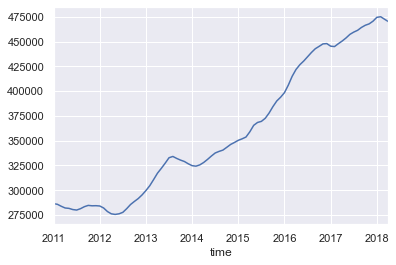

In [27]:
ts = df['60647'].resample('MS').mean()
ts.plot()

In [19]:
# ax = df.plot()
# # ax.legend(bbox_to_anchor=([1,1]))
# ax.set(title=f'Zip Code Home Values - {df.index.freq}')

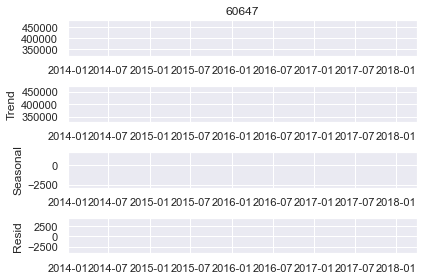

In [28]:
decomp_mul = seasonal_decompose(ts.loc['2014':],model='add')#,model='mul')
decomp_mul.plot();

In [29]:
def adfuller_test_df(ts):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    df_res = adfuller(ts)
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    return pd.DataFrame(res,index=['AD Fuller Results'])
adfuller_test_df(ts)


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-0.299251,0.92561,9,78,False,False


In [30]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['stationary?'] = dfoutput['p-value']<.05

    print (dfoutput)
    
    return dfoutput

Results of Dickey-Fuller Test:
Test Statistic                 -0.299251
p-value                         0.925610
#Lags Used                      9.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
stationary?                     0.000000
dtype: float64


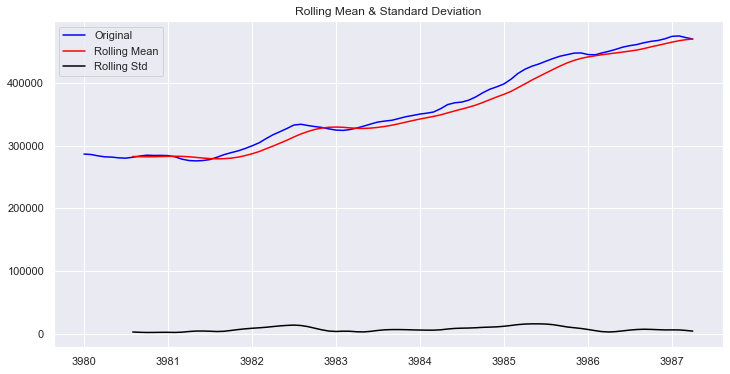

In [31]:
stationarity_check(ts);

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-0.299251,0.92561,9,78,False,False


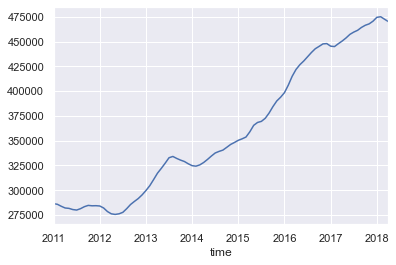

In [33]:
## Combine methods above into one DF
ts.loc['2011':'2018'].plot()

adfuller_test_df(ts)

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.259578,0.185336,8,78,False,False


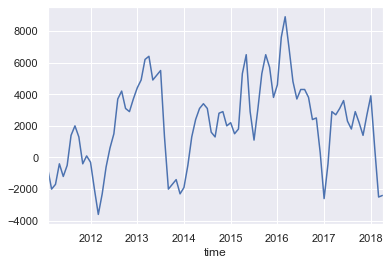

In [34]:
## Differencing 
ts0 = ts.diff().dropna()
ts0.plot()
adfuller_test_df(ts0)

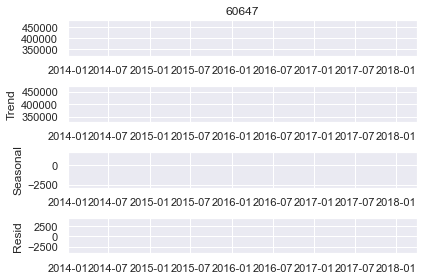

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts.loc['2014':])
decomp.plot();

<AxesSubplot:xlabel='time'>

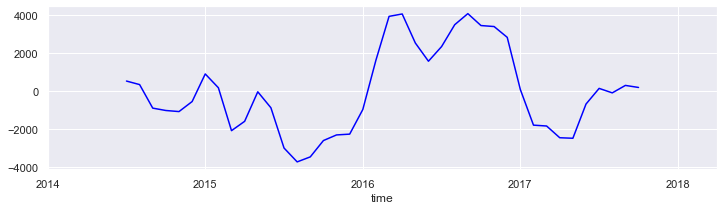

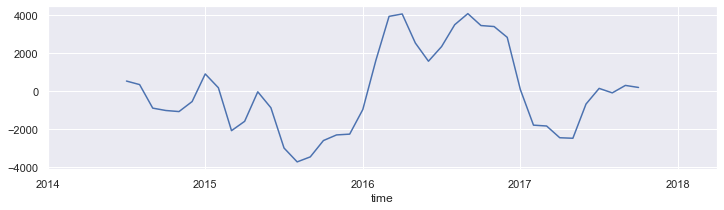

In [36]:
plt.rcParams['figure.figsize'] = [12,3]
decomp_mul.resid.plot(label='mul',color='blue')
plt.figure()
decomp.resid.plot()

,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-334911134188268.750000,0.000000,11,40,True,True


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.765910,0.063311,9,30,False,False


,Test Statistic,p-value,#Lags Used,# of Observations Used,p<.05,Stationary?
AD Fuller Results,-2.578683,0.097484,5,34,False,False


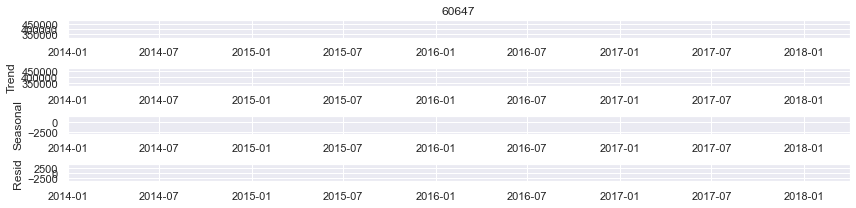

In [37]:
seasons = {'seasonal':decomp.seasonal,
          'trend':decomp.trend,
          'resid':decomp.resid}
for data,ts_ in seasons.items():
    ts_ = ts_.dropna()
#     ts_.plot(title=data)
    plt.show()
    display(adfuller_test_df(ts_).style.set_caption(data))
decomp.plot();

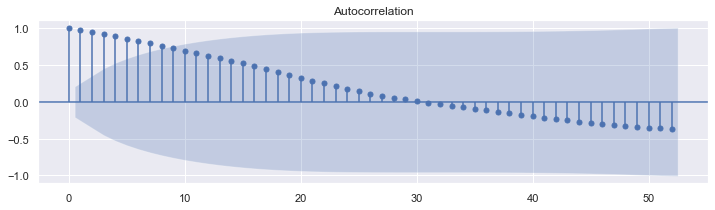

In [38]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(ts,lags=52);

In [42]:
# df.head()

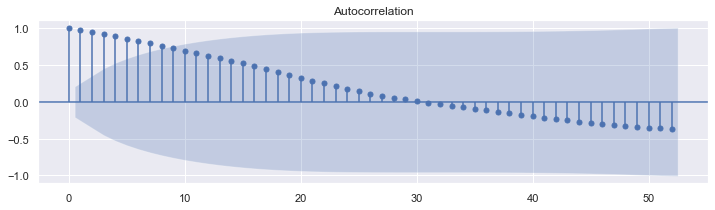

In [41]:
tsa.plot_acf(df['60647'],lags=52);

In [46]:
from pandas_profiling import ProfileReport

In [48]:
# profile = ProfileReport (df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile

In [87]:
# h_mean = df.groupby('Time').aggregate({'value':'mean'})
# h_mean

In [ ]:
h_mean.plot(figsize = (13,8));
h_mean.plot(figsize = (20,6), style = '.b');

In [52]:
# profile = ProfileReport (df_top, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile

In [59]:
df_top.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
2,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
3,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
4,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [61]:
df

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,60620,60634,60626,60649,60616,60622,60615,60641,60660,60608
time,,,,,,,,,,,,,,,,,,,,
2011-01-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,749200.0,127600.0,196600.0,316500.0,148800.0,289000.0,532700.0,372500.0,195100.0,429900.0,179800.0
2011-02-01,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,748600.0,126900.0,195000.0,317900.0,148700.0,288100.0,531700.0,370600.0,194600.0,428800.0,179400.0
2011-03-01,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,747300.0,125500.0,193200.0,319600.0,147200.0,287300.0,530900.0,368800.0,193700.0,426200.0,178200.0
2011-04-01,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,745300.0,124600.0,190600.0,321400.0,144800.0,286400.0,530600.0,368900.0,191200.0,419400.0,176900.0
2011-05-01,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,744200.0,123400.0,187600.0,320300.0,143200.0,286200.0,528700.0,369900.0,187600.0,413200.0,176800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,1018700.0,1299000.0,777900.0,470600.0,457900.0,1041300.0,162600.0,463100.0,127800.0,1045700.0,128300.0,258600.0,397100.0,155800.0,349900.0,816300.0,449600.0,286900.0,517700.0,230100.0
2018-01-01,1024400.0,1302700.0,778500.0,474500.0,457400.0,1051300.0,163500.0,464100.0,127100.0,1050800.0,127700.0,260500.0,393100.0,154100.0,350100.0,819300.0,450100.0,288300.0,521500.0,231100.0
2018-02-01,1030700.0,1306400.0,780500.0,475100.0,459000.0,1059300.0,164000.0,464200.0,126800.0,1050400.0,128000.0,262400.0,390800.0,151100.0,351500.0,819700.0,453000.0,289800.0,524100.0,233700.0


In [62]:
df.set_index('Time', inplace = True)
df.head()

KeyError: "None of ['Time'] are in the columns"